In [1]:
# -*- coding: utf-8 -*-
#Import Necessary Libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Read in and Explore the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
features_details = train.describe(include = "all");
nan_value_detail = pd.isnull(train).sum();

In [3]:
train.head()
print(nan_value_detail)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
kpi                        0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64


In [4]:
depart_unique = np.unique(train['department']);
depart_mapping = {depart_unique[0]: 1, depart_unique[1]: 2, depart_unique[2]: 3, depart_unique[3]: 4,
                  depart_unique[4]: 5, depart_unique[5]: 6, depart_unique[6]: 7,depart_unique[7]: 8,depart_unique[8]: 9}
train['departGroup'] = train['department'].map(depart_mapping)
test['departGroup'] = test['department'].map(depart_mapping)
#dropping the depart feature for now, might change
train = train.drop(['department'], axis = 1)
test = test.drop(['department'], axis = 1)


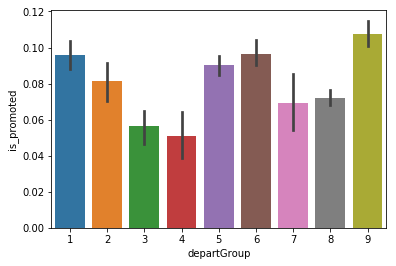

In [5]:
sns.barplot(x="departGroup", y="is_promoted", data=train)

In [6]:
region_unique = np.unique(train['region']);
region = dict()
r = 1
for rui in region_unique:
    region[rui] = r
    r = r + 1
train['regionGroup'] = train['region'].map(region)
test['regionGroup'] = test['region'].map(region)
#dropping the depart feature for now, might change
train = train.drop(['region'], axis = 1)
test = test.drop(['region'], axis = 1)

employee_id         education gender recruitment_channel  no_of_trainings  \
0        70800  Master's & above      f            sourcing                1   
1        10027        Bachelor's      f            sourcing                1   
2         6171        Bachelor's      m               other                1   
3        66362        Bachelor's      f               other                1   
4        52286  Master's & above      f               other                1   

   age  previous_year_rating  length_of_service  kpi  awards_won  \
0   37                   5.0                  8    1           1   
1   32                   4.0                  5    1           0   
2   32                   5.0                  4    0           1   
3   60                   3.0                 21    1           0   
4   34                   5.0                  6    1           1   

   avg_training_score  is_promoted  departGroup  regionGroup  
0                  99            1            5           29  
1                  99            1            5           32  
2                  99            1            6           15  
3                  99            1            6           12  
4                  99            1            8           21

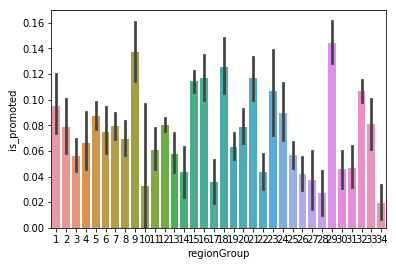

In [7]:
sns.barplot(x="regionGroup", y="is_promoted", data=train)
train.head()

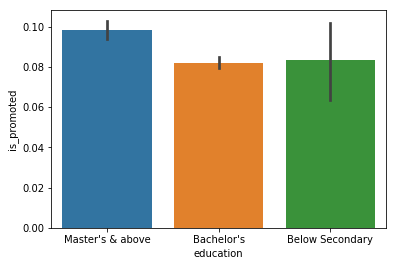

In [8]:
sns.barplot(x="education", y="is_promoted", data=train)

In [9]:
train = train.fillna({"education": "Bachelor's"})
test = test.fillna({"education": "Bachelor's"})
edu_unique = np.unique(train['education']);
education = dict()
r = 1
for eui in edu_unique:
    education[eui] = r
    r = r + 1
train['eduGroup'] = train['education'].map(education)
test['eduGroup'] = test['education'].map(education)
#dropping the depart feature for now, might change
train = train.drop(['education'], axis = 1)
test = test.drop(['education'], axis = 1)

In [10]:
gender_unique = np.unique(train['gender']);
gender = dict()
r = 1
for gen in gender_unique:
    gender[gen] = r
    r = r + 1
train['genderGroup'] = train['gender'].map(gender)
test['genderGroup'] = test['gender'].map(gender)
#dropping the depart feature for now, might change
train = train.drop(['gender'], axis = 1)
test = test.drop(['gender'], axis = 1)

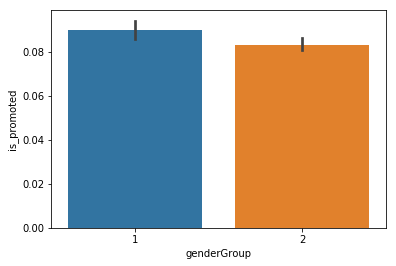

In [11]:
sns.barplot(x="genderGroup", y="is_promoted", data=train)

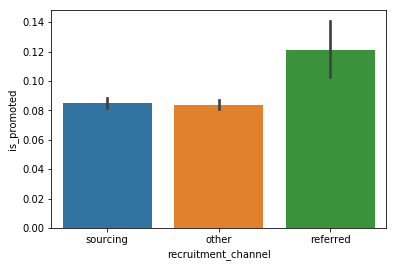

In [12]:
sns.barplot(x="recruitment_channel", y="is_promoted", data=train)
recruit_unique = np.unique(train['recruitment_channel']);
recruit = dict()
r = 1
for gen in recruit_unique:
    recruit[gen] = r
    r = r + 1
train['recruitGroup'] = train['recruitment_channel'].map(recruit)
test['recruitGroup'] = test['recruitment_channel'].map(recruit)
#dropping the depart feature for now, might change
train = train.drop(['recruitment_channel'], axis = 1)
test = test.drop(['recruitment_channel'], axis = 1)

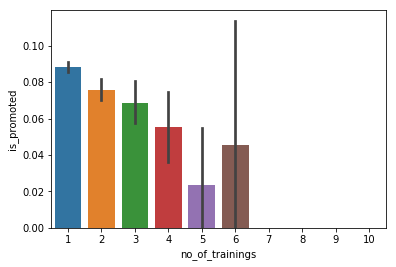

In [13]:
sns.barplot(x="no_of_trainings", y="is_promoted", data=train)
training_unique = np.unique(train['no_of_trainings']);
training = dict()
r = 1
for gen in training_unique:
    training[gen] = r
    r = r + 1
train['trainingGroup'] = train['no_of_trainings'].map(training)
test['trainingGroup'] = test['no_of_trainings'].map(training)
#dropping the depart feature for now, might change
train = train.drop(['no_of_trainings'], axis = 1)
test = test.drop(['no_of_trainings'], axis = 1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
23460    0
23461    0
23462    1
23463    1
23464    1
23465    1
23466    0
23467    0
23468    0
23469    0
23470    0
23471    0
23472    1
23473    0
23474    0
23475    0
23476    0
23477    0
23478    0
23479    0
23480    0
23481    0
23482    0
23483    0
23484    0
23485    0
23486    0
23487    0
23488    0
23489    1
Name: avg_training_scoreg, Length: 23490, dtype: int64


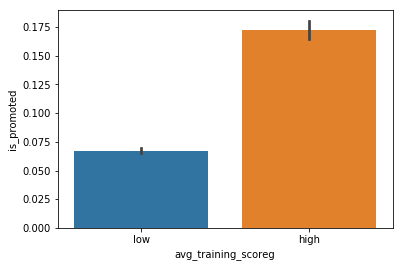

In [24]:
#sort the ages into logical categories
bins = [30,80,np.inf]
labels = ['low','high']
train['avg_training_scoreg'] = pd.cut(train["avg_training_score"], bins, labels = labels)
test['avg_training_scoreg'] = pd.cut(test["avg_training_score"], bins, labels = labels)
#print(test['avg_training_scoreg'])
#draw a bar plot of Age vs. survival
sns.barplot(x="avg_training_scoreg", y="is_promoted", data=train)
avg_training_scoreg_unique = np.unique(train['avg_training_scoreg']);
avg_training_scoreg_mapping = {avg_training_scoreg_unique[0]: 1, avg_training_scoreg_unique[1]: 0}
                  
train['avg_training_scoreg'] = train['avg_training_scoreg'].map(avg_training_scoreg_mapping)
test['avg_training_scoreg'] = test['avg_training_scoreg'].map(avg_training_scoreg_mapping)
print(test['avg_training_scoreg'])
#dropping the depart feature for now, might change
#train = train.drop(['avg_training_score'], axis = 1)
#test = test.drop(['avg_training_score'], axis = 1)

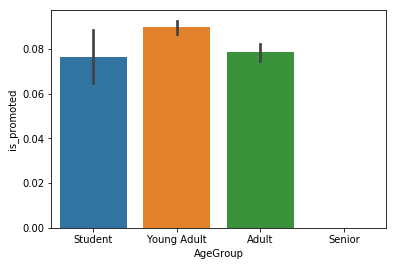

In [25]:
#sort the ages into logical categories
bins = [18, 24, 35, 60, np.inf]
labels = ['Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["age"], bins, labels = labels)
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="is_promoted", data=train)
AgeGroup_unique = np.unique(train['AgeGroup']);
AgeGroup = dict()
r = 1
for gen in AgeGroup_unique:
    AgeGroup[gen] = r
    r = r + 1
train['AgeGroup'] = train['AgeGroup'].map(AgeGroup)
test['AgeGroup'] = test['AgeGroup'].map(AgeGroup)
#dropping the depart feature for now, might change
train = train.drop(['age'], axis = 1)
test = test.drop(['age'], axis = 1)

In [26]:
train.head()

employee_id  previous_year_rating  length_of_service  kpi  awards_won  \
0        70800                   5.0                  8    1           1   
1        10027                   4.0                  5    1           0   
2         6171                   5.0                  4    0           1   
3        66362                   3.0                 21    1           0   
4        52286                   5.0                  6    1           1   

   avg_training_score  is_promoted  departGroup  regionGroup  eduGroup  \
0                  99            1            5           29         3   
1                  99            1            5           32         1   
2                  99            1            6           15         1   
3                  99            1            6           12         1   
4                  99            1            8           21         3   

   genderGroup  recruitGroup  trainingGroup  avg_training_scoreg  AgeGroup  
0            1             3              1                    1         1  
1            1             3              1                    1         3  
2            2             1              1                    1         3  
3            1             1              1                    1         1  
4            1             1              1                    1         3

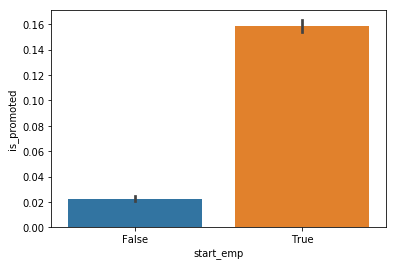

In [29]:
train['start_emp'] = np.logical_or(train['awards_won'],train['avg_training_scoreg'])
test['start_emp'] = np.logical_or(test['awards_won'],test['avg_training_scoreg'])

train['start_emp'] = np.logical_or(train['start_emp'],train['kpi'])
test['start_emp'] = np.logical_or(test['start_emp'],test['kpi'])

sns.barplot(x="start_emp", y="is_promoted", data=train)

start_emp_unique = np.unique(train['start_emp']);
sempGroup = dict()
r = 1
for gen in start_emp_unique:
    sempGroup[gen] = r
    r = r + 1
train['sempGroup'] = train['start_emp'].map(sempGroup)
test['sempGroup'] = test['start_emp'].map(sempGroup)
#dropping the depart feature for now, might change
train = train.drop(['start_emp'], axis = 1)
test = test.drop(['start_emp'], axis = 1)

In [30]:
train.head()

employee_id  previous_year_rating  length_of_service  kpi  awards_won  \
0        70800                   5.0                  8    1           1   
1        10027                   4.0                  5    1           0   
2         6171                   5.0                  4    0           1   
3        66362                   3.0                 21    1           0   
4        52286                   5.0                  6    1           1   

   avg_training_score  is_promoted  departGroup  regionGroup  eduGroup  \
0                  99            1            5           29         3   
1                  99            1            5           32         1   
2                  99            1            6           15         1   
3                  99            1            6           12         1   
4                  99            1            8           21         3   

   genderGroup  recruitGroup  trainingGroup  avg_training_scoreg  AgeGroup  \
0            1             3              1                    1         1   
1            1             3              1                    1         3   
2            2             1              1                    1         3   
3            1             1              1                    1         1   
4            1             1              1                    1         3   

   sempGroup  
0          2  
1          2  
2          2  
3          2  
4          2

In [31]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(np.mean(train['previous_year_rating']))
test['previous_year_rating'] = test['previous_year_rating'].fillna(np.mean(train['previous_year_rating']))

In [32]:
from sklearn.model_selection import train_test_split
x = train.drop(['is_promoted', 'employee_id'], axis=1)
y = train["is_promoted"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100, oob_score = True)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)


# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

88.18
92.11
90.45
93.61
92.83
91.75
93.96


In [34]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [ acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

Model  Score
6  Gradient Boosting Classifier  93.96
2                 Random Forest  93.61
0                           KNN  92.83
1           Logistic Regression  92.11
5   Stochastic Gradient Descent  91.75
4                 Decision Tree  90.45
3                   Naive Bayes  88.18

In [35]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
gbk2 = GradientBoostingClassifier()
scores = cross_val_score(gbk2, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9365118  0.9345658  0.93578205 0.94040379 0.9379713  0.9360253
 0.93772805 0.93675505 0.93599416 0.93842784]
Mean: 0.9370165128679391
Standard Deviation: 0.0015736624585208502


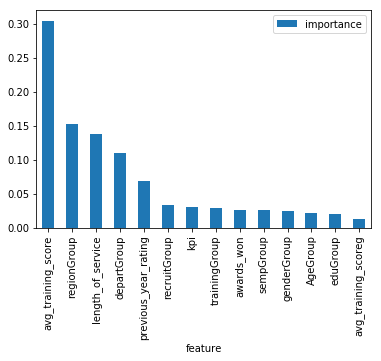

In [36]:
#features minify
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(gbk2, x_train, y_train, cv=3)
CM = confusion_matrix(y_train, predictions)

In [38]:
print(CM)

[[37513    55]
 [ 2536  1002]]


In [39]:
#precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
#f1 score
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

Precision: 0.9479659413434248
Recall: 0.28321085358959863


0.4361262241566921

In [91]:
#test predict
x_test = test.drop(['employee_id'], axis=1)
#y_test = test["is_promoted"]
# Gaussian Naive Bayes
from sklearn.metrics import accuracy_score
gbk3 = GradientBoostingClassifier()
gbk3.fit(x_train, y_train)
y_pred_test = gbk3.predict(x_test)
#acc_gaussian = ''
#print(y_pred_test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
loadid =np.array(test["employee_id"])
my_solution = pd.DataFrame(y_pred_test, loadid, columns = ["is_promoted"])
print(my_solution)

# Check that your data frame has 418 entries
#print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("solution6.csv", index_label = ["employee_id"])

       is_promoted
8724             0
74430            0
72255            0
38562            0
64486            0
46232            0
54542            0
67269            0
66174            0
76303            0
60245            0
42639            0
30963            0
54055            0
42996            0
12737            0
27561            0
26622            0
31582            0
29793            0
72735            0
5677             0
60889            0
51498            0
8566             0
53151            0
16203            0
61083            0
74849            0
13259            0
...            ...
72190            0
27155            0
15959            0
72900            0
57683            0
55174            0
51115            0
50134            0
59775            0
14408            0
4351             0
59625            0
29379            0
67979            0
61451            0
73871            0
52090            0
18488            0
59673            0
39410            0
11837       

In [61]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

94.23


In [92]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [93]:
roc_auc

0.6468626075589159

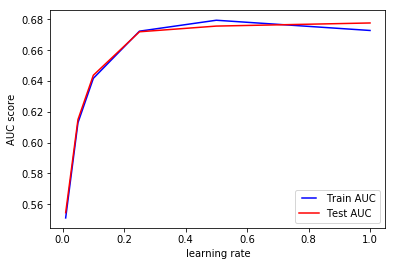

In [124]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

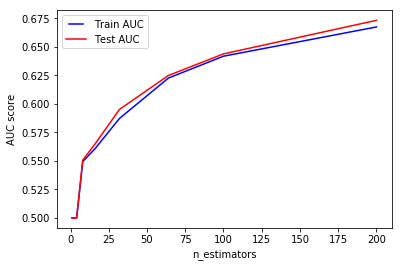

In [128]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

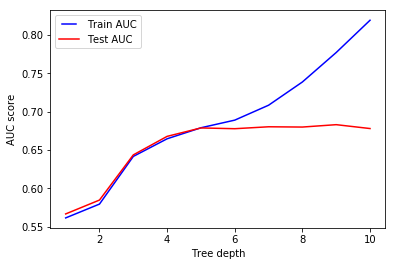

In [130]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

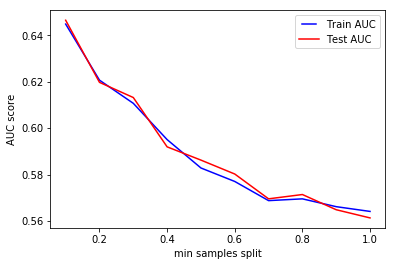

In [94]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

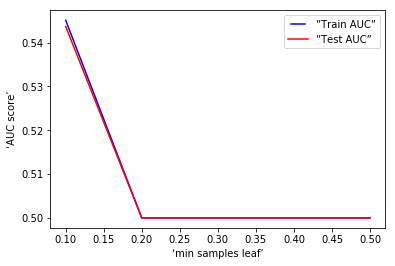

In [95]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='”Train AUC”')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='”Test AUC”')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('‘AUC score’')
plt.xlabel('‘min samples leaf’')
plt.show()

In [97]:
train.shape[1]

14

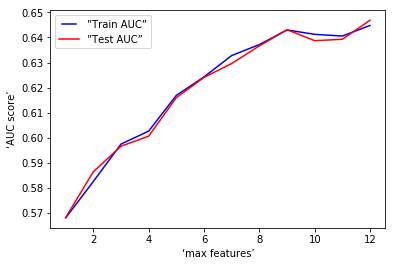

In [100]:
max_features = list(range(1,13))

train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(x_train, y_train)

   train_pred = model.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_val)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_features, train_results, 'b', label='”Train AUC”')
line2, = plt.plot(max_features, test_results, 'r', label='”Test AUC”')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('‘AUC score’')
plt.xlabel('‘max features’')
plt.show()

In [40]:
#test predict
x_test = test.drop(['employee_id'], axis=1)
#y_test = test["is_promoted"]
# Gaussian Naive Bayes
from sklearn.metrics import accuracy_score
eta = 0.7
estimator = 100
max_depth = 5
min_samples_leaf = 0.10
max_feature = 11
gbk3 = GradientBoostingClassifier(learning_rate=eta,n_estimators=estimator,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_feature)
gbk3.fit(x_train, y_train)
y_pred_test = gbk3.predict(x_test)
#acc_gaussian = ''
#print(y_pred_test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
loadid =np.array(test["employee_id"])
my_solution = pd.DataFrame(y_pred_test, loadid, columns = ["is_promoted"])
print(my_solution)

# Check that your data frame has 418 entries
#print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("solution14.csv", index_label = ["employee_id"])

       is_promoted
8724             0
74430            0
72255            0
38562            0
64486            0
46232            0
54542            0
67269            0
66174            0
76303            0
60245            0
42639            0
30963            0
54055            0
42996            0
12737            0
27561            0
26622            0
31582            0
29793            0
72735            0
5677             0
60889            0
51498            0
8566             0
53151            0
16203            0
61083            0
74849            0
13259            0
...            ...
72190            0
27155            0
15959            0
72900            0
57683            0
55174            0
51115            0
50134            0
59775            0
14408            0
4351             0
59625            0
29379            0
67979            0
61451            0
73871            0
52090            0
18488            0
59673            0
39410            0
11837       